## Rubric

Instructions: DELETE this cell before you submit via a `git push` to your repo before deadline. This cell is for your reference only and is not needed in your report. 

 Scoring: Out of 10 points

- Each Developing  => -2 pts
- Each Unsatisfactory/Missing => -4 pts
  - until the score is 0

If students address the detailed feedback in a future checkpoint they will earn these points back






|                                  | **Unsatisfactory**                                                                                                                                                                                                                                                                                                                        | **Developing**                                                                                                                                                                                                       | **Proficient**                                                                                                                                                                                            | **Excellent**                                                                                                                                                                            |
|----------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **EDA relevance**                | EDA is mostly neither relevant to the question nor helpful in figuring out how to address the question. Or the EDA does address the question, but many obviously relevant variables / analyses / figures were not included. | EDA is partly irrelevant/unhelpful. EDA missed one or two obvioulsy relevant analysis (distributions of single variables or relationships between variables) | EDA includes the obviously relevant / helpful variables in addressing the question.                                                              | Thorough EDA fully explored the dataset                                                                                                                 |
| **EDA analysis and description** | Many of the analyses are poor choices (e.g., using means instead of medians for obviously skewed data), or are poorly described in the text, or do not aid understanding the data                                                                                                                                                     | Some of the analyses are poor choices, or are poorly described in the text, or do not aid understanding the data                                                                                                 | All analyses are correct choices. Only one or two have minor issues in the text descriptions supporting them. Mostly they fit well with other elements of the EDA and support understanding the data  | All analyses are correct choices with clear text descriptions supporting them. The figures fit well with the other elements of the EDA, producing a clear understanding of the data. |
| **EDA figures**                  | Many of the figures are poor plot choices (e.g., using a bar plot to represent a time series where it would be better to use a line plot) or have poor aesthetics (including colormap, data point shape/color, axis labels, titles, annotations, text legibility) or do not aid understanding the data                                | Some of the figures are poor plot choices or have poor aesthetics. Some figures do not aid understanding the data                                                                                                | All figures are correct plot choices. Only one or two have minor questionable aesthetic choices. The figures mostly fit well with the other elements of the EDA and support understanding the data    | All figures are correct plot choices with beautiful aesthetics. The figures fit well with the other elements of the EDA, producing a clear understanding of the data.                |





# COGS 108 - EDA Checkpoint

## Authors

Instructions: REPLACE the contents of this cell with your team list and their contributions. Note that this will change over the course of the checkpoints

This is a modified [CRediT taxonomy of contributions](https://credit.niso.org). For each group member please list how they contributed to this project using these terms:
> Analysis, Background research, Conceptualization, Data curation, Experimental investigation, Methodology, Project administration, Software, Visualization, Writing – original draft, Writing – review & editing

Example team list and credits:
- Alice Anderson: Conceptualization, Data curation, Methodology, Writing - original draft
- Bob Barker:  Analysis, Software, Visualization
- Charlie Chang: Project administration, Software, Writing - review & editing
- Dani Delgado: Analysis, Background research, Visualization, Writing - original draft

# Research Question

Instructions: REPLACE the contents of this cell with your work, including any updates to recover points lost in your proposal feedback



## Background and Prior Work

Instructions: REPLACE the contents of this cell with your work, including any updates to recover points lost in your proposal feedback

# Hypothesis


Instructions: REPLACE the contents of this cell with your work, including any updates to recover points lost in your proposal feedback

## Data

### Data overview

Instructions: REPLACE the contents of this cell with your work, including any updates to recover points lost in your data checkpoint feedback


In [ ]:
# Run this code every time when you're actively developing modules in .py files.  It's not needed if you aren't making modules
#
## this code is necessary for making sure that any modules we load are updated here 
## when their source code .py files are modified

%load_ext autoreload
%autoreload 2

In [ ]:
# Setup code -- Run only once after cloning!!! 
#
# this code downloads the data from its source to the `data/00-raw/` directory
# if the data hasn't updated you don't need to do this again!

# if you don't already have these packages (you should!) uncomment this line
# %pip install requests tqdm

import sys
sys.path.append('./modules') # this tells python where to look for modules to import

import get_data # this is where we get the function we need to download data

# replace the urls and filenames in this list with your actual datafiles
# yes you can use Google drive share links or whatever
# format is a list of dictionaries; 
# each dict has keys of 
#   'url' where the resource is located
#   'filename' for the local filename where it will be stored 
datafiles = [
    { 'url': 'https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/airline-safety/airline-safety.csv', 'filename':'airline-safety.csv'},
    { 'url': 'https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/bad-drivers/bad-drivers.csv', 'filename':'bad-drivers.csv'}
]

get_data.get_raw(datafiles,destination_directory='data/00-raw/')

### Dataset #1 

Instructions: REPLACE the contents of this cell and the one below with your work, including any updates to recover points lost in your data checkpoint feedback

In [ ]:
## YOUR CODE TO LOAD/CLEAN/TIDY/WRANGLE THE DATA GOES HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION 

### Dataset #2
 as above, add any more copies of this that you need to given how many datasets you have

In [ ]:
## YOUR CODE TO LOAD/CLEAN/TIDY/WRANGLE THE DATA GOES HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION 

## Results

### Exploratory Data Analysis

Instructions: replace the words in this subsection with whatever words you need to setup and preview the EDA you're going to do.   

Please explicitly load the fully wrangled data you will use from `data/02-processed`.  This is a good idea rather than forcing people to re-run the data getting / wrangling cells above.  Sometimes it takes a long time to get / wrangle data compared to reloading the fixed up dataset.

Carry out whatever EDA you need to for your project in the code cells below.  Because every project will be different we can't really give you much of a template at this point. But please make sure you describe the what and why in text here as well as providing interpretation of results and context.

Please note that you should consider the use of python modules in your work.  Any code which gets called repeatedly should be modularized. So if you run the same pre-processing, analysis or visualiazation on different subsets of the data, then you should turn that into a function or class.  Put that function or class in a .py file that lives in `modules/`.  Import the module you made and use it to get your work done.  For reference see `get_raw()` which is inside `modules/get_data.py`. 



#### Section 1 of EDA - please give it a better title than this

Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

In [ ]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

#### Section 2: Average Concurrent PLayer Counts (by Play Mode)

**Goal:** Explore how average concurrent players vary across play modes (singleplayer, multiplayer, co-op) over time and across periods:
- pre-COVID: 2018-2019
- COVID: 2020-2021
- post-COIVD: 2022-2023

**Important note:** Play mode tags are not mutually exclusive (a game can be both multiplayer and co-op). We "explode" tags so games can appear in multiple modes. Because of this, mode totals should not be interpreted as disjoint categories—proportions/comparisons are the most meaningful view.


In [31]:
import pandas as pd
import seaborn as sns
from pathlib import Path
sns.set_theme(style="whitegrid")

--- Load SteamCharts monthly data ---

In [32]:
steam = pd.read_csv("data/02-processed/steamcharts_2018_2023_ok.csv")
steam["date"] = pd.to_datetime(steam["month"])  # month is YYYY-MM

--- Load all yearly tag files (2018-2023) and build an appid -> tags mapping ---

In [33]:
processed_dir = Path("data/02-processed")
tag_files = sorted(processed_dir.glob("*_top250_final.csv"))

tags_all = pd.concat(
    [pd.read_csv(f)[["appid", "tags"]] for f in tag_files],
    ignore_index=True
).drop_duplicates("appid")

def parse_tags(s):
    s = str(s).strip().strip("[]")
    if s == "":
        return []
    return [t.strip().strip("'").strip('"') for t in s.split(",")]

tags_all["tags_list"] = tags_all["tags"].apply(parse_tags)

--- Merge player counts with tags ---

In [34]:
df = steam.merge(tags_all[["appid", "tags_list"]], on="appid", how="left")

--- Add period labels ---

In [35]:
def period_label(y):
    if 2018 <= y <= 2019:
        return "pre-COVID (2018-2019)"
    if 2020 <= y <= 2021:
        return "COVID (2020-2021)"
    return "post-COVID (2022-2023)"

df["period"] = df["year"].apply(period_label)
period_order = ["pre-COVID (2018-2019)", "COVID (2020-2021)", "post-COVID (2022-2023)"]
df["period"] = pd.Categorical(df["period"], categories=period_order, ordered=True)

--- Explode tags into long format and keep only modes we care about ---

In [36]:
long_df = df.explode("tags_list").rename(columns={"tags_list": "mode"})
long_df = long_df[long_df["mode"].isin(["singleplayer", "multiplayer", "co-op"])].copy()

###  Trend over time — share of avg players by play mode

For each month, we sum avg players by mode (after exploding tags), then convert to a within-month proportion across modes.

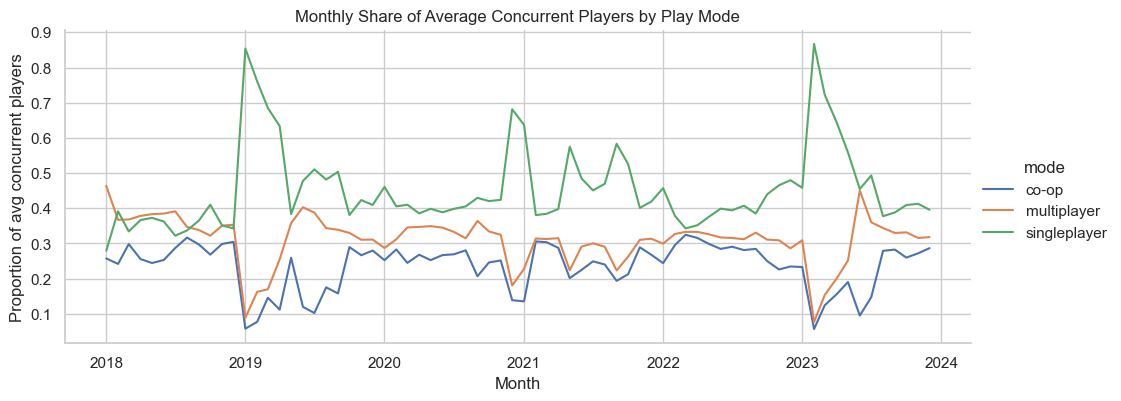

In [37]:
monthly_mode = (
    long_df.groupby(["date", "mode"], as_index=False, observed=True)["avg_players"]
    .sum()
)

monthly_totals = (
    monthly_mode.groupby("date", as_index=False, observed=True)["avg_players"]
    .sum()
    .rename(columns={"avg_players": "total_avg_players"})
)

monthly_mode = monthly_mode.merge(monthly_totals, on="date")
monthly_mode["share"] = monthly_mode["avg_players"] / monthly_mode["total_avg_players"]

sns.relplot(
    data=monthly_mode,
    x="date",
    y="share",
    hue="mode",
    kind="line",
    height=4,
    aspect=2.5
).set(
    title="Monthly Share of Average Concurrent Players by Play Mode",
    xlabel="Month",
    ylabel="Proportion of avg concurrent players"
)

### Graph Interpretation
Across most months, _singleplayer-tagged_ games hold the largest share of average concurrent players, with multiplayer and co-op splitting the remainder. The share isn’t perfectly stable though. There are a few sharp swings (notably around early 2019 and early 2023) where singleplayer spikes and multiplayer/co-op drop. Since play mode tags overlap and we explode tags, these spikes likely reflect a small number of extremely high-concurrency titles that are tagged strongly in one mode (or changes in the Top 250 mix), rather than a sudden behavior change across the entire market.

### Period comparison — typical per-game avg players (distribution)
For each game within each period, we average its monthly avg_players, then compare distributions across modes and periods.


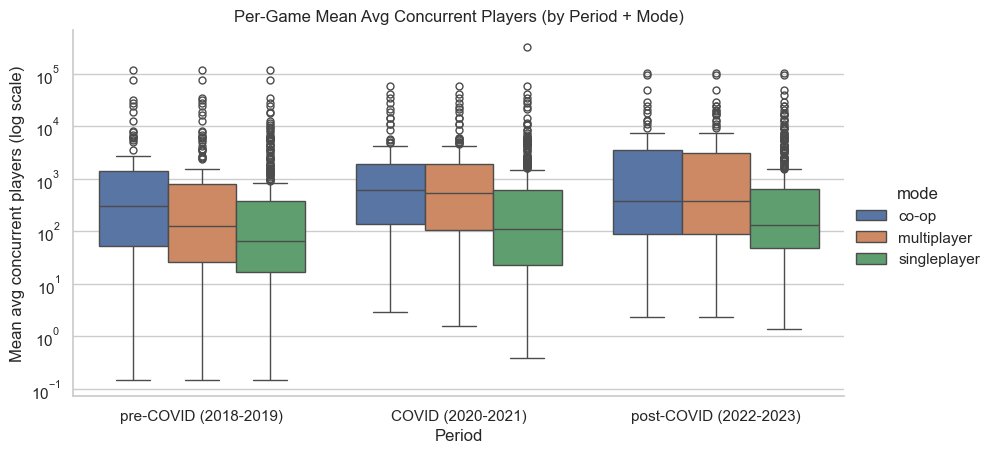

In [ ]:
game_period = (
    long_df.groupby(["appid", "mode", "period"], as_index=False, observed=True)["avg_players"]
    .mean()
    .rename(columns={"avg_players": "avg_players_mean"})
)

sns.catplot(
    data=game_period,
    x="period",
    y="avg_players_mean",
    hue="mode",
    kind="box",
    height=4.5,
    aspect=2.0
).set(
    title="Per-Game Mean Avg Concurrent Players (by Period + Mode)",
    xlabel="Period",
    ylabel="Mean avg concurrent players (log scale)"
)

# Log scale helps because player counts are usually very skewed.
# (This line is still seaborn-friendly, it just edits the axis. Please do not end me Ashley/Kiet)
import matplotlib.pyplot as plt
plt.yscale("log")

### Graph Interpretation:
The distributions are highly right-skewed (a few games have extremely large average player counts), which is why the log scale helps comparisons. Across all three periods, multiplayer and co-op tend to have higher typical per-game average concurrency than singleplayer (higher medians and wider upper ranges). This suggests that while singleplayer dominates _overall share_ in the monthly plot, the “typical” multiplayer/co-op title in this dataset often sustains higher average concurrency once a game is popular enough to be in the Top 250.

### Summary — mode shares by period
Within each period, we aggregate avg players by mode and convert to a proportion.


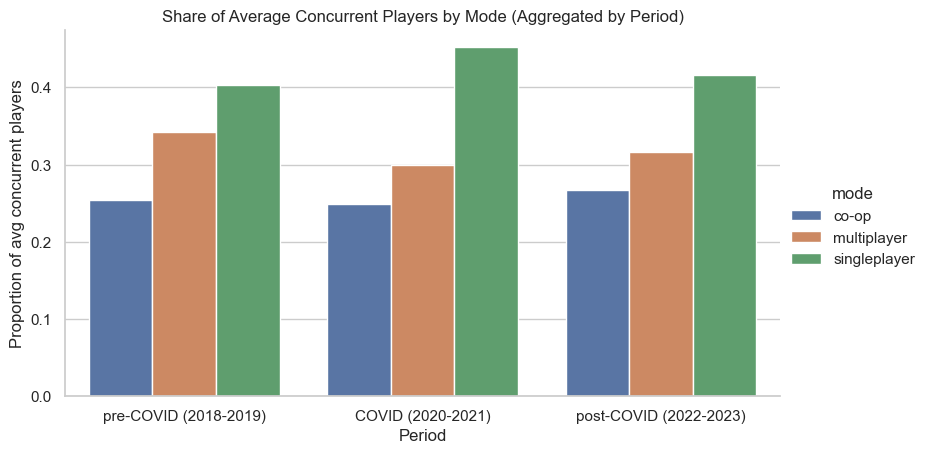

In [39]:
period_mode = (
    long_df.groupby(["period", "mode"], as_index=False, observed=True)["avg_players"]
    .sum()
)

period_totals = (
    period_mode.groupby("period", as_index=False, observed=True)["avg_players"]
    .sum()
    .rename(columns={"avg_players": "period_total"})
)

period_mode = period_mode.merge(period_totals, on="period")
period_mode["share"] = period_mode["avg_players"] / period_mode["period_total"]

sns.catplot(
    data=period_mode,
    x="period",
    y="share",
    hue="mode",
    kind="bar",
    height=4.5,
    aspect=1.8
).set(
    title="Share of Average Concurrent Players by Mode (Aggregated by Period)",
    xlabel="Period",
    ylabel="Proportion of avg concurrent players"
)

### Graph Interpretation:
When we aggregate within each period, singleplayer remains the largest share in all three periods, but the proportions shift slightly over time. Compared to pre-COVID, the COVID and post-COVID periods show a modest redistribution toward multiplayer and/or co-op (depending on the exact bar heights). These changes are not huge, but they suggest that the pandemic era may have nudged more player attention toward social play modes, even though singleplayer still leads overall.

#### Section 3 of EDA
Blah blah blah.

In [40]:
# Insert some code here. Hello world!

## Ethics

Instructions: REPLACE the contents of this cell with your work, including any updates to recover points lost in your proposal feedback

## Team Expectations 

Instructions: REPLACE the contents of this cell with your work, including any updates to recover points lost in your proposal feedback

## Project Timeline Proposal

Instructions: Replace this with your timeline.  **PLEASE UPDATE your Timeline!** No battle plan survives contact with the enemy, so make sure we understand how your plans have changed.  Also if you have lost points on the previous checkpoint fix them